Importing the Dependencies


In [57]:
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt


Data collection and Analysis

In [9]:
# Read the CSV File
df =pd.read_csv('/content/spam_ham.csv')

In [10]:
#print the first 5 row of data
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
#print the shape(get the number of rows and columns)
df.shape

(5171, 4)

In [12]:
#get the columns names
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [13]:
#check for duplicates and remove them
df.drop_duplicates(inplace=True)

In [14]:
df.shape


(5171, 4)

In [15]:
#show the numbewr of missing (NAN,NaN,na) data fro each column
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [16]:
#download the stopwaord packge
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
def process_text(text):

  #1 remove punctuation
  nopunc=[char for char in text if char not in string.punctuation]
  nopunc=''.join(nopunc)

  #2 remove stopwords
  clean_words=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  #3 return a list of clean text words
  return clean_words

In [18]:
#show the tokenization(a list of token also called lemmas)
df['text'].head().apply(process_text)

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: text, dtype: object

In [25]:
#Convert a collection of text to a matrix of token
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])


**Splitting the Dataset**

In [29]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(messages_bow,df['label_num'],test_size=0.20,random_state=15)

In [30]:
#Get the shape of messages_bow
messages_bow.shape

(5171, 50381)

***Naive Bayes Classifier***


Accuracy For Naive Bayes Vlassifier:  0.9797101449275363


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes Classifier')

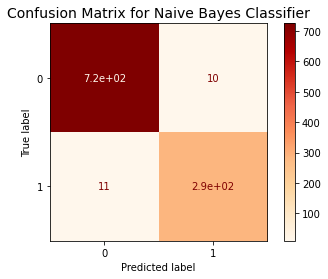

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,Y_train)

#print the prediction 
NB_pred=NB_classifier.predict(X_test)

print("\nAccuracy For Naive Bayes Vlassifier: ",accuracy_score(NB_pred,Y_test))
plot_confusion_matrix(NB_classifier,X_test,Y_test,cmap='OrRd')
plt.title('Confusion Matrix for Naive Bayes Classifier', fontsize = 14)

In [63]:
#print the predictions on X_test
print("predicted Values(X_test)",*NB_classifier.predict(X_test))

#print the actual values
print("Actual Value(Y_test): ",*Y_test.values)

predicted Values(X_test) 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0

**Logistic Regression**


Accuracy For Logistic Regression:  0.9884057971014493


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

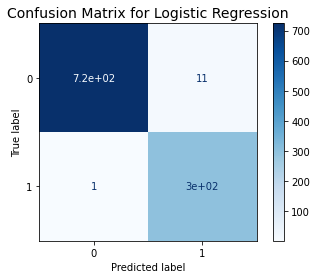

In [67]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver='lbfgs',max_iter=1000)
logReg.fit(X_train,Y_train)

#print the prediction 
Log_pred=logReg.predict(X_test)

print("\nAccuracy For Logistic Regression: ",accuracy_score(Log_pred,Y_test))
plot_confusion_matrix(logReg,X_test,Y_test,cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 14)

In [80]:
#print the predictions on X_test
print("predicted Values(X_test)",*logReg.predict(X_test))

#print the actual values|
print("Actual Value(Y_test): ",*Y_test.values)

predicted Values(X_test) 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0

**Linear SVC**


Accuracy For Logistic Regression:  0.9739130434782609


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, 'Confusion Matrix for Linear SVC')

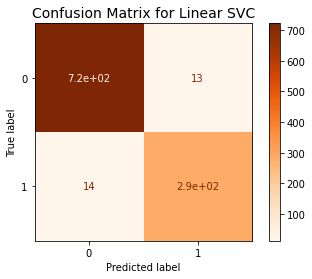

In [79]:
from sklearn.svm import LinearSVC
Linear_SVC = LinearSVC(random_state=0)
Linear_SVC.fit(X_train,Y_train)

#print the prediction 
svc_pred=Linear_SVC.predict(X_test)

print("\nAccuracy For Logistic Regression: ",accuracy_score(svc_pred,Y_test))
plot_confusion_matrix(Linear_SVC,X_test,Y_test,cmap='Oranges')
plt.title('Confusion Matrix for Linear SVC', fontsize = 14)

In [81]:
#print the predictions on X_test
print("predicted Values(X_test)",*Linear_SVC.predict(X_test))

#print the actual values|
print("Actual Value(Y_test): ",*Y_test.values)

predicted Values(X_test) 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0

In [82]:
print("Accuracy for Diff Models:")

print("*Naive Bayes Classifier:     ", round(accuracy_score(NB_pred, Y_test)*100, 2), "%")
print("*Logistic Regression:     ", round(accuracy_score(Log_pred, Y_test)*100, 2), "%")
print("*Linear SVC:     ", round(accuracy_score(svc_pred, Y_test)*100, 2), "%")

Accuracy for Diff Models:
*Naive Bayes Classifier:      97.97 %
*Logistic Regression:      98.84 %
*Linear SVC:      97.39 %
